# This is all about visualizing the data to understand it in a better way.

let's import package:

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Code to read CSV file

In [2]:
df=pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Check if the dataset contain some null values.

In [3]:
df[df.isnull()].count()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

check column name.

In [4]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

## Now let's perform some operation on diffrent questions.

Q.1)Add 'overweight' column

In [15]:
df['overweight']=(df['weight']/df['height']/100**2)>25

In [16]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,False
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,False
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,False
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,False
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,False
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,False


Q.2)Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [24]:
medical_data={1:0,2:1,3:1}
df['cholesterol']=df['cholesterol'].map(medical_data)
df['gluc']=df['gluc'].map(medical_data)

In [25]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,False
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,False
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,False
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,False
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,False
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,False


Q.3)Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight

In [28]:
df_cat = pd.melt(
      frame=df, value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], 
      id_vars=['cardio']
  )

In [30]:
df_cat


,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,False
419996,1,overweight,False
419997,1,overweight,False
419998,1,overweight,False


Q.4)Group and reformat the data to split it by 'cardio'. Show the counts of each feature.

In [31]:
df_cat = pd.DataFrame(
      df_cat.groupby(
          ['variable', 'value', 'cardio'])['value'].count()).rename(
          columns={'value': 'total'}).reset_index()

In [32]:
df_cat

,variable,value,cardio,total
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941
7,alco,1,1,1823
8,cholesterol,0,0,29330
9,cholesterol,0,1,23055


### Set up the matplotlib figure and draw the catplot

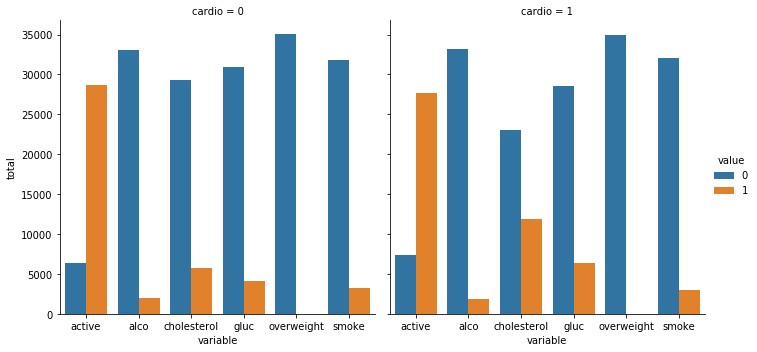

In [34]:
sns.catplot(x='variable', y='total', hue='value', 
              col='cardio', data=df_cat, kind='bar')

Draw heat map

In [35]:
# clean the data.
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
            (df['height'] >= df['height'].quantile(0.025)) &
            (df['height'] <= df['height'].quantile(0.975)) &
            (df['weight'] >= df['weight'].quantile(0.025)) & 
            (df['weight'] <= df['weight'].quantile(0.975))]

In [36]:
df_heat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,False
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,False
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,False
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,False
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,False
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,False


Q.5)Find the correlation

In [38]:
corr=df_heat.corr()

In [40]:
#generate a mask
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

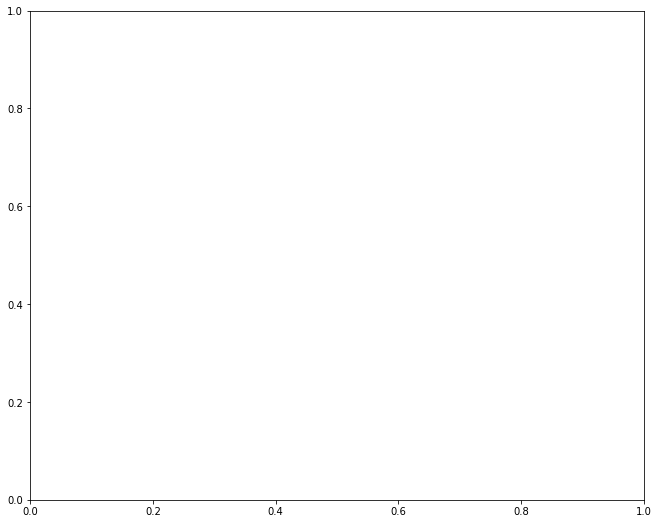

In [41]:
fig, ax = plt.subplots(figsize=(11, 9))

Draw heat map with the mask.

SyntaxError: 'return' outside function (<ipython-input-43-75d1600d9c86>, line 4)

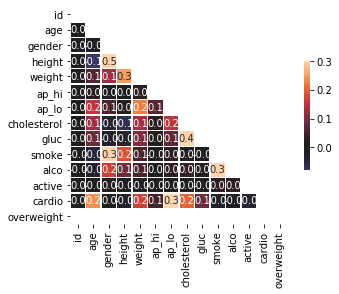

In [43]:
sns.heatmap(corr, annot=True, fmt='.1f', mask=mask, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})
fig.savefig('heatmap.png')
return fig
